# Housing Price Predictor

This repository is built off of the ML training course on Kaggle. The data I use in this repository is mine and is pulled from an API. It is built from the Decision Trees MN Housing Price Predictor Repository. The Data in this repository is slightly altered to work with missing values and categorical variables.

Here is what I have learned from the course:

1. missing values categorical variables
2. pipelines
3. cross-validation
4. XGBoost

In [71]:
import pandas as pd
import numpy as np

import json
import requests

Housing API - Removed the url and key. ALl can be found at Realty rapidAPI.com
import requests

url = 

querystring = {"city":"Minneapolis","state_code":"MN","offset":"0","limit":"200","sort":"relevance","radius":"20","age_min":"1990","age_max":"2020","baths_min":"2","beds_min":"2","price_min":"300000"}

headers = {
    'x-rapidapi-key': 
    'x-rapidapi-host': "realty-in-us.p.rapidapi.com"
    }

response = requests.request("GET", url, headers=headers, params=querystring)

print(response.text)

import json

json_data = json.loads(response.text)

readable_file = 'readable_realty_data.json'
with open(readable_file, 'w') as f:
    json.dump(json_data, f, indent=4)

In [5]:
#Explore structure of the data
filename = 'readable_realty_data.json'
with open(filename) as f:
    readable_realty_data = json.load(f)

readable_realty_data = readable_realty_data['properties']
print(len(readable_realty_data))

200


In [6]:
#extracting the data
prop_ids, urls, cities, lines, postal_codes, counties, lats, lons, prices, baths_fulls, bedrooms, building_sizes, lot_sizes  =[],[],[],[], [], [], [], [],[],[], [], [], []


for data in readable_realty_data:
    prop_id = data['property_id']
    url = data['rdc_web_url']
    city = data['address']['city']
    line = data['address']['line']   
    postal_code = data['address']['postal_code']
    county = data['address']['county']
    lat = data['address']['lat']
    lon = data['address']['lon']
    price = data['price']
    baths_full = data['baths_full']
    bedroom = data['beds']
    building_size = data['building_size']['size']
    lot_size = data['lot_size']['size']
    
    
    
    prop_ids.append(prop_id)
    urls.append(url)
    cities.append(city)
    lines.append(line)
    postal_codes.append(postal_code)
    counties.append(county)
    lats.append(lat)
    lons.append(lon)
    prices.append(price)
    baths_fulls.append(baths_full)
    bedrooms.append(bedroom)
    building_sizes.append(building_size)
    lot_sizes.append(lot_size)

In [7]:
# converting json dataset from dictionary to dataframe
df = pd.DataFrame([prop_ids,urls,cities,lines, postal_codes, counties, lats, lons, prices,baths_fulls, bedrooms, building_sizes, lot_sizes]).T
df = df.rename(columns = {0:'prop_ids',1:'urls',2:'cities',3:'lines', 4:'postal_codes', 5:'counties', 6:'lats', 7:'lons', 8:'prices', 9:'baths_fulls',10:'bedrooms',11:'building_sizes', 12:'lot_sizes'})



In [8]:
df.head()

,prop_ids,urls,cities,lines,postal_codes,counties,lats,lons,prices,baths_fulls,bedrooms,building_sizes,lot_sizes
0,M7927081518,https://www.realtor.com/realestateandhomes-det...,Saint Paul,79 Cretin Ave N,55104,Ramsey,44.944,-93.1928,600000,2,4,3143,14375
1,M8412373846,https://www.realtor.com/realestateandhomes-det...,Minneapolis,1716 Tyler St NE,55413,Hennepin,45.0055,-93.2465,475000,3,5,2448,8276
2,M7324092858,https://www.realtor.com/realestateandhomes-det...,Eagan,2094 Quartz Ln,55122,Dakota,44.8001,-93.2149,324900,2,4,1620,9017
3,M8405448159,https://www.realtor.com/realestateandhomes-det...,Robbinsdale,3628 Regent Ave N,55422,Hennepin,45.0214,-93.3437,314999,2,4,2255,5227
4,M8627783588,https://www.realtor.com/realestateandhomes-det...,Saint Louis Park,2732 Joppa Ave S,55416,Hennepin,44.9531,-93.3345,649900,3,3,2571,6098


In [9]:
#Exporting the Pandas file into CSV to remove some missing values
#I recommend creating missing data in an excel file and saving as a CSV

df.to_csv(r'/Users/matthewhockert/Desktop/personal_python_projects/XGBoost Housing price.csv', index = False)

In [10]:
#Importing the now edited data

df = pd.read_csv (r'/Users/matthewhockert/Desktop/personal_python_projects/housing.csv')
print (df)

        prop_ids                                               urls  \
0    M7927081518  https://www.realtor.com/realestateandhomes-det...   
1    M8412373846  https://www.realtor.com/realestateandhomes-det...   
2    M7324092858  https://www.realtor.com/realestateandhomes-det...   
3    M8405448159  https://www.realtor.com/realestateandhomes-det...   
4    M8627783588  https://www.realtor.com/realestateandhomes-det...   
..           ...                                                ...   
195  M8648754867  https://www.realtor.com/realestateandhomes-det...   
196  M8495826109  https://www.realtor.com/realestateandhomes-det...   
197  M7820115149  https://www.realtor.com/realestateandhomes-det...   
198  M8145996706  https://www.realtor.com/realestateandhomes-det...   
199  M8152976290  https://www.realtor.com/realestateandhomes-det...   

               cities               lines  postal_codes  counties       lats  \
0          Saint Paul     79 Cretin Ave N         55104    Ramsey  

In [11]:
df.head()

,prop_ids,urls,cities,lines,postal_codes,counties,lats,lons,prices,baths_fulls,bedrooms,building_sizes,lot_sizes
0,M7927081518,https://www.realtor.com/realestateandhomes-det...,Saint Paul,79 Cretin Ave N,55104,Ramsey,44.944009,-93.192846,600000,2.0,4.0,3143.0,14375
1,M8412373846,https://www.realtor.com/realestateandhomes-det...,Minneapolis,1716 Tyler St NE,55413,Hennepin,45.005543,-93.246466,475000,3.0,5.0,2448.0,8276
2,M7324092858,https://www.realtor.com/realestateandhomes-det...,Eagan,2094 Quartz Ln,55122,Dakota,44.800149,-93.214939,324900,2.0,4.0,1620.0,9017
3,M8405448159,https://www.realtor.com/realestateandhomes-det...,Robbinsdale,3628 Regent Ave N,55422,Hennepin,45.021414,-93.343719,314999,2.0,4.0,2255.0,5227
4,M8627783588,https://www.realtor.com/realestateandhomes-det...,Saint Louis Park,2732 Joppa Ave S,55416,Hennepin,44.953099,-93.334462,649900,3.0,3.0,2571.0,6098


In [74]:
df.isnull()

,prop_ids,urls,cities,lines,postal_codes,counties,lats,lons,prices,baths_fulls,bedrooms,building_sizes,lot_sizes
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,False,False,False,False,False,False,False,False,False,False,False,False,False
196,False,False,False,False,False,False,False,False,False,False,True,False,False
197,False,False,False,False,False,False,False,False,False,True,False,False,False
198,False,False,False,False,False,False,False,False,False,False,False,False,False


# Correlation Matrix

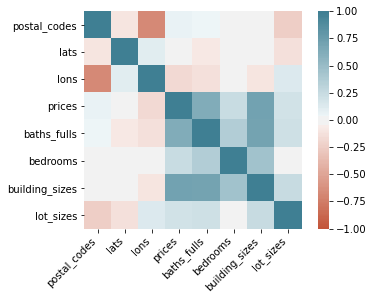

In [79]:
#This is for fun - in econometrics it is typically very important to look for covariance. 
#Here in the ML world I am finding this to be less important.

import seaborn as sns

corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# Missing values

Three approaches:
1. Delete column
2. Imputation (the averaging of the non-missing data in the column and placing it in the missing cell)
3. Imputation but adding another categorical column stating whether the cell was imputed or not.

In my classes we rarely did this. I believe if the values were not missing a significant quantity of data we would run regressions by dropping the data or row. If the cell was missing a larger portion of the data we wouldn't use the data. However, these techniques are interesting and as I suspected somewhat popular within the industry.

In [14]:
from sklearn.model_selection import train_test_split

#dependent variable
y = df.prices

#independent variables
features = ['baths_fulls','bedrooms','building_sizes','lot_sizes']
X = df[features]

#validation
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

In [15]:
train_X.dtypes

baths_fulls       float64
bedrooms          float64
building_sizes    float64
lot_sizes           int64
dtype: object

In [16]:
#Delete column

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Function for comparing different approaches
def score_dataset(train_X, val_X, train_y, val_y):
    model = RandomForestRegressor(n_estimators=10, random_state=0)
    model.fit(train_X, train_y)
    preds = model.predict(val_X)
    return mean_absolute_error(val_y, preds)

In [17]:
# Get names of columns with missing values
cols_with_missing = [col for col in train_X.columns
                     if train_X[col].isnull().any()]

# Drop columns in training and validation data
reduced_X_train = train_X.drop(cols_with_missing, axis=1)
reduced_X_valid = val_X.drop(cols_with_missing, axis=1)

print("MAE from Approach 1 (Drop columns with missing values):")
print(score_dataset(reduced_X_train, reduced_X_valid, train_y, val_y))

MAE from Approach 1 (Drop columns with missing values):
185553.64417032205


In [18]:
#Imputation

from sklearn.impute import SimpleImputer

# Imputation - averaging the values
my_imputer = SimpleImputer()
#Preprocessing the data
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(train_X))
imputed_X_valid = pd.DataFrame(my_imputer.transform(val_X))

# Imputation removed column names; put them back
imputed_X_train.columns = train_X.columns
imputed_X_valid.columns = val_X.columns

print("MAE from Approach 2 (Imputation):")
print(score_dataset(imputed_X_train, imputed_X_valid, train_y, val_y))

MAE from Approach 2 (Imputation):
133832.794


In [19]:
#Imputation plus categorical column
# Make copy to avoid changing original data (when imputing)
X_train_plus = train_X.copy()
X_valid_plus = val_X.copy()

# Make new columns indicating what will be imputed
for col in cols_with_missing:
    X_train_plus[col + '_was_missing'] = X_train_plus[col].isnull()
    X_valid_plus[col + '_was_missing'] = X_valid_plus[col].isnull()

# Imputation
my_imputer = SimpleImputer()
imputed_X_train_plus = pd.DataFrame(my_imputer.fit_transform(X_train_plus))
imputed_X_valid_plus = pd.DataFrame(my_imputer.transform(X_valid_plus))

# Imputation removed column names; put them back
imputed_X_train_plus.columns = X_train_plus.columns
imputed_X_valid_plus.columns = X_valid_plus.columns

print("MAE from Approach 3 (An Extension to Imputation):")
print(score_dataset(imputed_X_train_plus, imputed_X_valid_plus, train_y, val_y))

MAE from Approach 3 (An Extension to Imputation):
134648.794


The second approach proved to be the best approach. This is kind of obvious because we do not eliminate large quantity of data like in the first approach. The third approach did well but simply does not perform as well as the second.

# Categorical Variables


This section of the training includes and explanation of ordinal and nominal variables. Ordinal seems to work best when their is an intrinsic scale of value such as neutral, good, great would follow 0,1,2. Nominal would work best with this dataset as the categorical values don't seem to be better but instead should be encoded to a specific number and the algorithm finds the value. In this example I'll use counties.

In [61]:
#Importing none missing data

#df = pd.read_csv (r'/Users/matthewhockert/Desktop/personal_python_projects/XGBoost.csv')
#print (df)

        prop_ids                                               urls  \
0    M7927081518  https://www.realtor.com/realestateandhomes-det...   
1    M8412373846  https://www.realtor.com/realestateandhomes-det...   
2    M7324092858  https://www.realtor.com/realestateandhomes-det...   
3    M8405448159  https://www.realtor.com/realestateandhomes-det...   
4    M8627783588  https://www.realtor.com/realestateandhomes-det...   
..           ...                                                ...   
195  M8648754867  https://www.realtor.com/realestateandhomes-det...   
196  M8495826109  https://www.realtor.com/realestateandhomes-det...   
197  M7820115149  https://www.realtor.com/realestateandhomes-det...   
198  M8145996706  https://www.realtor.com/realestateandhomes-det...   
199  M8152976290  https://www.realtor.com/realestateandhomes-det...   

               cities               lines  postal_codes  counties       lats  \
0          Saint Paul     79 Cretin Ave N         55104    Ramsey  

In [64]:
#df.isnull()

,prop_ids,urls,cities,lines,postal_codes,counties,lats,lons,prices,baths_fulls,bedrooms,building_sizes,lot_sizes
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,False,False,False,False,False,False,False,False,False,False,False,False,False
196,False,False,False,False,False,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False,False,False,False


In [98]:
#imputing the non-categorical variables
df_mean_imputed = df.fillna(df.mean())
df_median_imputed = df.fillna(df.median())
df_mean_imputed

# Separate target from predictors
y = df_mean_imputed.prices
features = ['counties','baths_fulls','bedrooms','building_sizes','lot_sizes']
X = df_mean_imputed[features]

#split data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)


# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = low_cardinality_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

Kaggle teaches to just drop the columns with missing values. 

#Drop columns with missing values (simplest approach)
cols_with_missing = [col for col in X_train_full.columns if X_train_full[col].isnull().any()] 
X_train_full.drop(cols_with_missing, axis=1, inplace=True)
X_valid_full.drop(cols_with_missing, axis=1, inplace=True)

However, in my situation I'd have one two independent variables. The code at the beginning of the previous block allows you to impute the missing non-categorical independent variables and use all of the variables instead of losing data. Code:

df_mean_imputed = df.fillna(df.mean())
df_median_imputed = df.fillna(df.median())
df_mean_imputed

In [95]:
X_train_full.dtypes

counties           object
baths_fulls       float64
bedrooms          float64
building_sizes    float64
lot_sizes           int64
dtype: object

In [99]:
#verifying that the null values are filled
X_train_full.isnull()

,counties,baths_fulls,bedrooms,building_sizes,lot_sizes
134,False,False,False,False,False
66,False,False,False,False,False
26,False,False,False,False,False
113,False,False,False,False,False
168,False,False,False,False,False
...,...,...,...,...,...
67,False,False,False,False,False
192,False,False,False,False,False
117,False,False,False,False,False
47,False,False,False,False,False


In [97]:
# Get list of categorical variables
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['counties']


In [100]:
X_train.head()

,counties,baths_fulls,bedrooms,building_sizes,lot_sizes
134,Ramsey,2.000000,4.000000,1750.0,14331
66,Ramsey,2.407407,4.000000,2365.0,42253
26,Hennepin,2.000000,2.000000,1400.0,27704
113,Ramsey,2.000000,2.000000,1374.0,1307
168,Ramsey,2.000000,3.666667,2808.0,10411


In [105]:
X_train

,counties,baths_fulls,bedrooms,building_sizes,lot_sizes
134,Ramsey,2.000000,4.000000,1750.0,14331
66,Ramsey,2.407407,4.000000,2365.0,42253
26,Hennepin,2.000000,2.000000,1400.0,27704
113,Ramsey,2.000000,2.000000,1374.0,1307
168,Ramsey,2.000000,3.666667,2808.0,10411
...,...,...,...,...,...
67,Hennepin,2.000000,3.000000,1556.0,10019
192,Hennepin,2.407407,6.000000,2594.0,39204
117,Carver,3.000000,4.000000,2704.0,16553
47,Hennepin,4.000000,4.000000,2556.0,9583


In [102]:
#Building MAE function
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

In [103]:
drop_X_train = X_train.select_dtypes(exclude=['object'])
drop_X_valid = X_valid.select_dtypes(exclude=['object'])

print("MAE from Approach 1 (Drop categorical variables):")
print(score_dataset(drop_X_train, drop_X_valid, y_train, y_valid))

MAE from Approach 1 (Drop categorical variables):
96513.70800000001


Ordinal coding was not used here because of the wide variety of counties within the data. This high value would have made the data dense, difficult to interpret, and less valuable.

In [167]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[object_cols]))

In [168]:
# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

In [169]:
# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

In [170]:
# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

print("MAE from Approach 3 (One-Hot Encoding):") 
print(score_dataset(OH_X_train, OH_X_valid, y_train, y_valid))

MAE from Approach 3 (One-Hot Encoding):
105183.58475000001


In [171]:
OH_X_train.head()

,baths_fulls,bedrooms,building_sizes,lot_sizes,0,1,2,3,4,5
134,2.000000,4.000000,1750.0,14331,0.0,0.0,0.0,0.0,1.0,0.0
66,2.407407,4.000000,2365.0,42253,0.0,0.0,0.0,0.0,1.0,0.0
26,2.000000,2.000000,1400.0,27704,0.0,0.0,0.0,1.0,0.0,0.0
113,2.000000,2.000000,1374.0,1307,0.0,0.0,0.0,0.0,1.0,0.0
168,2.000000,3.666667,2808.0,10411,0.0,0.0,0.0,0.0,1.0,0.0


## Pipelines

In [173]:
#Building/splitting dataset
y = df.prices
features = ['counties','baths_fulls','bedrooms','building_sizes','lot_sizes']
X = df[features]

X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [176]:
#Low cardinality - cardinality is the value of unique observations within a column. We want low cardinality
# to keep the dataset smaller
categorical_cols = [catname for catname in X_train_full.columns if X_train_full[catname].nunique() < 10 and 
                        X_train_full[catname].dtype == "object"]

In [177]:
# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

In [178]:
# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [181]:
X_train.head()

,counties,baths_fulls,bedrooms,building_sizes,lot_sizes
134,Ramsey,2.0,4.0,1750.0,14331
66,Ramsey,NaN,4.0,2365.0,42253
26,Hennepin,2.0,2.0,1400.0,27704
113,Ramsey,2.0,2.0,1374.0,1307
168,Ramsey,2.0,NaN,2808.0,10411


In [182]:
X_valid.head()

,counties,baths_fulls,bedrooms,building_sizes,lot_sizes
18,Ramsey,NaN,3.0,2011.0,5663
170,Hennepin,3.0,3.0,4405.0,10454
107,Hennepin,3.0,3.0,NaN,10019
98,Hennepin,2.0,4.0,2152.0,12632
177,Dakota,2.0,3.0,1650.0,9932


Step 1: Define Preprocessing Steps

In [183]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [185]:
# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data - imputes the values
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

Step 2: Define the Model

In [186]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=0)

Step 3: Create and Evaluate the Pipeline

In [188]:
from sklearn.metrics import mean_absolute_error

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

MAE: 103835.46975


In [319]:
X_valid.head()

,counties,baths_fulls,bedrooms,building_sizes,lot_sizes
18,Ramsey,NaN,3.0,2011.0,5663
170,Hennepin,3.0,3.0,4405.0,10454
107,Hennepin,3.0,3.0,NaN,10019
98,Hennepin,2.0,4.0,2152.0,12632
177,Dakota,2.0,3.0,1650.0,9932


This process was much easier to understand and implement compared to traditional ML processing. We also received a lower score than the third approach for missing data.

# Cross-Validation

In [311]:
#Building/splitting dataset
y = df.prices
features = ['baths_fulls','bedrooms','building_sizes','lot_sizes']
X = df[features]

In [312]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

#building pipeline
my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', RandomForestRegressor(n_estimators=50,
                                                              random_state=0))
                             ])


In [313]:
#The model wouldn't let me use a categorical variable - Hopefully will return to this in the future for code that does allow that

from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

MAE scores:
 [107412.9975 121508.69   119776.945   91844.008  140529.2935]


highest score is best

In [314]:
print("Average MAE score (across experiments):")
print(scores.mean())

Average MAE score (across experiments):
116214.38680000001


In [315]:
def get_score(n_estimators):
    """Return the average MAE over 3 CV folds of random forest model.
    
    Keyword argument:
    n_estimators -- the number of trees in the forest
    """
    # Replace this body with your own code
    my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', RandomForestRegressor(n_estimators,
                                                              random_state=0))
                             ])
    scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=3,
                              scoring='neg_mean_absolute_error')
    return scores.mean()
print(scores.mean())

116214.38680000001


In [316]:
#How many trees should be in our model? - 50, 100, 150, ..., 300, 350, 400
results = {} # Your code here

for i in range(1,20):
    results[50*i] = get_score(50*i)

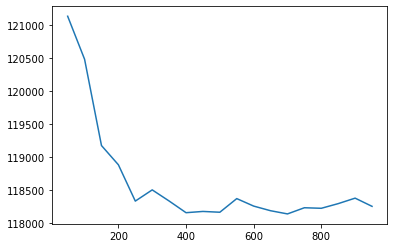

In [317]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(results.keys()), list(results.values()))
plt.show()

In [318]:
n_estimators_best = min(results, key=results.get)
print(n_estimators_best)

700


400 or more trees provides the best quality it seems. This also seems very high.

In [293]:
my_pipeline = Pipeline(steps=[
    ('preprocessor', SimpleImputer()),
    ('model', RandomForestRegressor(n_estimators=700, random_state=0))
])

In [294]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("Average MAE score:", scores.mean())

Average MAE score: 112761.9572142857


In [310]:
#The cell above as a function - looking at n-neighbors as 700
def new_score(n_neighbors=700):
    my_pipeline = Pipeline(steps=[
    ('preprocessor', SimpleImputer()),
    ('model', RandomForestRegressor(n_estimators, random_state=0))])
    
    scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("Average MAE score:", scores.mean())
    

Average MAE score: 112761.9572142857


Unsurprising the random forest ran better with a higher n-neighbors (the optimal) based on the n_estimators test. However, it did worse than the models above (the models above had an extra variable in the categorical form)

# XGBoost

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split

#Building/splitting dataset
y = df.prices
features = ['baths_fulls','bedrooms','building_sizes','lot_sizes']
X = df[features]

In [15]:
#separate data
X_train, X_valid, y_train, y_valid = train_test_split(X, y)

In [16]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None)

In [19]:
#test outcome
from sklearn.metrics import mean_absolute_error

predictions = my_model.predict(X_valid)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_valid)))

Mean Absolute Error: 111969.31875


In [20]:
#Setting the model values
my_model = XGBRegressor(n_estimators=500)
my_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None)

In [28]:
from sklearn.metrics import mean_absolute_error

# Get predictions
predictions = my_model.predict(X_valid)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_valid)))

Mean Absolute Error: 104737.411875


In [30]:
#Exploring early_stopping_rounds
my_model = XGBRegressor(n_estimators=500)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)],
             verbose=False)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None)

In [31]:
# Get predictions
predictions = my_model.predict(X_valid)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_valid)))

Mean Absolute Error: 109534.590625


In [34]:
#Because a lower learning rate and higher n_estimators is better we set an XGBoost model below .1
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)], 
             verbose=False)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None)

In [35]:
# Get predictions
predictions = my_model.predict(X_valid)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_valid)))

Mean Absolute Error: 104737.411875


In [38]:
#n_jobs helps with faster computing with larger datasets
#also increased the n_estimators
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)], 
             verbose=False)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None)

In [78]:
# Get predictions
predictions = my_model.predict(X_valid)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_valid)))

Mean Absolute Error: 104737.411875


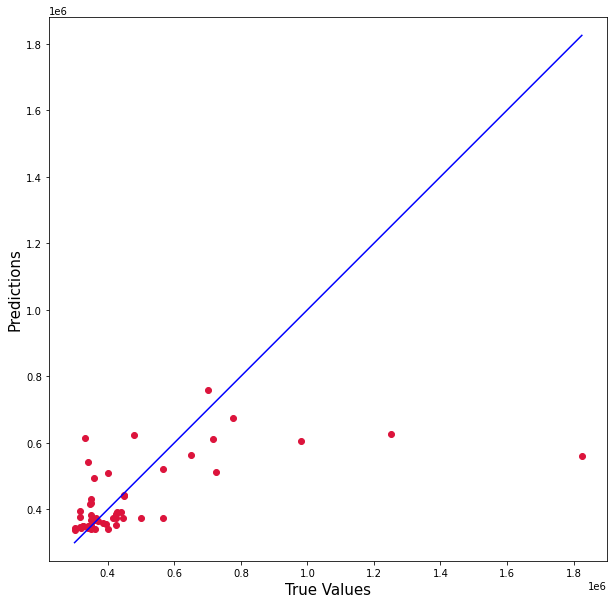

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(y_valid, predictions, c='crimson')

p1 = max(max(predictions), max(y_valid))
p2 = min(min(predictions), min(y_valid))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

Because the models do not change much nor very comprehensive the MAE does not change greatly between each model. However, it is clear how easy it is to build an XGBoost model is and use gradient descent. The graph directly above shows the accuracy of the predictions. The closer the red dots are to the blue line the better. 